In [176]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

In [184]:
# Import weather data from .txt file, skip first two rows

df = pd.read_csv("mar_2021.txt", header=None, skiprows=2, parse_dates=[[0, 1]], dayfirst = True, sep="\t")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
0,2021-03-01 00:30:00,7.7,7.8,7.7,78,4.1,0.0,---,0.0,0.0,...,50,7.2,16.7,---,---,0.0,690,1,100.0,30
1,2021-03-01 01:00:00,7.6,7.7,7.6,76,3.6,0.0,---,0.0,0.0,...,49,7.0,16.7,---,---,0.0,689,1,100.0,30
2,2021-03-01 01:30:00,7.4,7.7,7.4,80,4.2,0.0,---,0.0,0.0,...,49,7.0,16.7,---,---,0.0,695,1,100.0,30
3,2021-03-01 02:00:00,7.4,7.4,7.4,78,3.9,0.0,---,0.0,0.0,...,49,7.1,16.9,---,---,0.0,696,1,100.0,30
4,2021-03-01 02:30:00,7.4,7.6,7.4,78,3.8,0.0,---,0.0,0.0,...,49,7.2,17.0,---,---,0.0,699,1,100.0,30


In [185]:
# Replace headers

header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'THSW Index', 'Bar', 'Rain', 'Rain Rate', 'Solar Rad.', 'Solar Energy', 'Hi Solar Rad.',
 'UV Index', 'UV Dose', 'Hi UV', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'Temp 2nd', 'Hum 2nd', 'ET', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Hum,In Dew,In Heat,Temp 2nd,Hum 2nd,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2021-03-01 00:30:00,7.7,7.8,7.7,78,4.1,0.0,---,0.0,0.0,...,50,7.2,16.7,---,---,0.0,690,1,100.0,30
1,2021-03-01 01:00:00,7.6,7.7,7.6,76,3.6,0.0,---,0.0,0.0,...,49,7.0,16.7,---,---,0.0,689,1,100.0,30
2,2021-03-01 01:30:00,7.4,7.7,7.4,80,4.2,0.0,---,0.0,0.0,...,49,7.0,16.7,---,---,0.0,695,1,100.0,30
3,2021-03-01 02:00:00,7.4,7.4,7.4,78,3.9,0.0,---,0.0,0.0,...,49,7.1,16.9,---,---,0.0,696,1,100.0,30
4,2021-03-01 02:30:00,7.4,7.6,7.4,78,3.8,0.0,---,0.0,0.0,...,49,7.2,17.0,---,---,0.0,699,1,100.0,30


In [197]:
# Function to print max, min and mean

def summary(head):
    print(head)
    print('Max -', df[head].max())
    print('Min -', df[head].min())
    print('Average -', round(df['Temp Out'].mean(), 1))
    print("\n")

In [198]:
summary('Temp Out')
summary('Out Hum')
summary('Bar')

Temp Out
Max - 11.6
Min - 0.3
Average - 6.6


Out Hum
Max - 100
Min - 60
Average - 6.6


Bar
Max - 1036.6
Min - 964.7
Average - 6.6




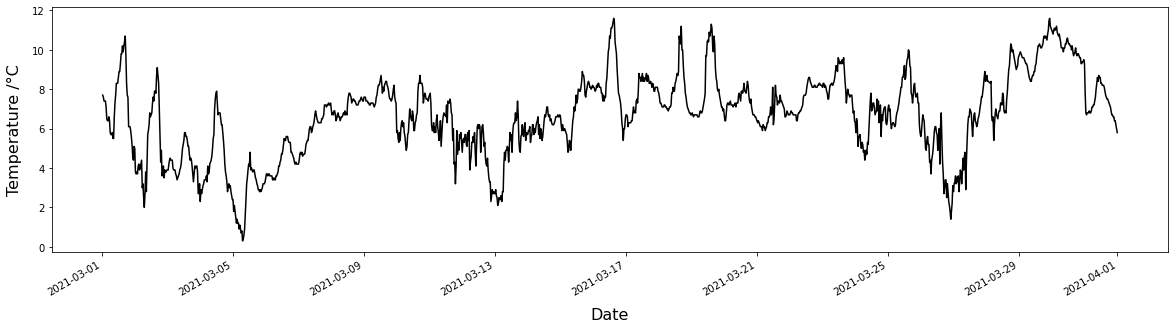

In [199]:
# Plot graph

ax = df.plot(kind='line', x = 'DateTime', y ='Temp Out', fontsize=10, legend=False, color = 'black',  figsize=(20, 5))
ax.set_xlabel("Date", fontsize=16, labelpad=10)
ax.set_ylabel("Temperature /°C", fontsize=16, labelpad=10)

plot = ax.get_figure()
plot.set_facecolor('white')
plot.savefig("temperature" + '.png', bbox_inches='tight', dpi=600)

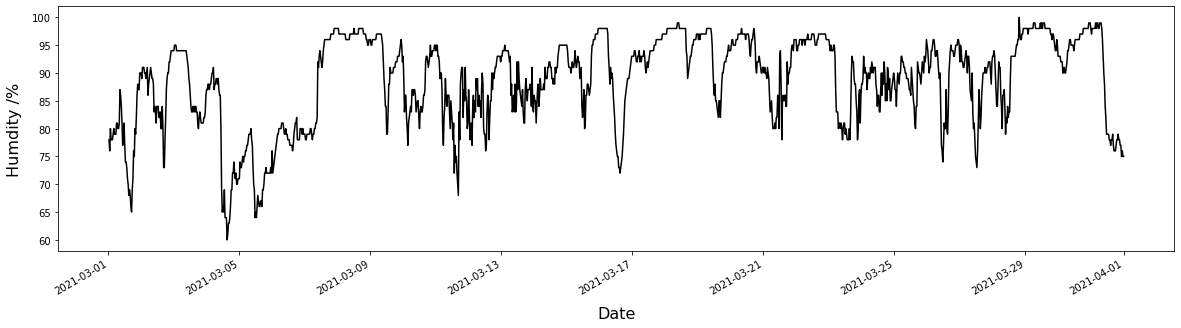

In [189]:
# Plot graph

ax = df.plot(kind='line', x = 'DateTime', y ='Out Hum', fontsize=10, legend=False, color = 'black',  figsize=(20, 5))
ax.set_xlabel("Date", fontsize=16, labelpad=10)
ax.set_ylabel("Humdity /%", fontsize=16, labelpad=10)

plot = ax.get_figure()
plot.set_facecolor('white')
plot.savefig("humdity" + '.png', bbox_inches='tight', dpi=600)

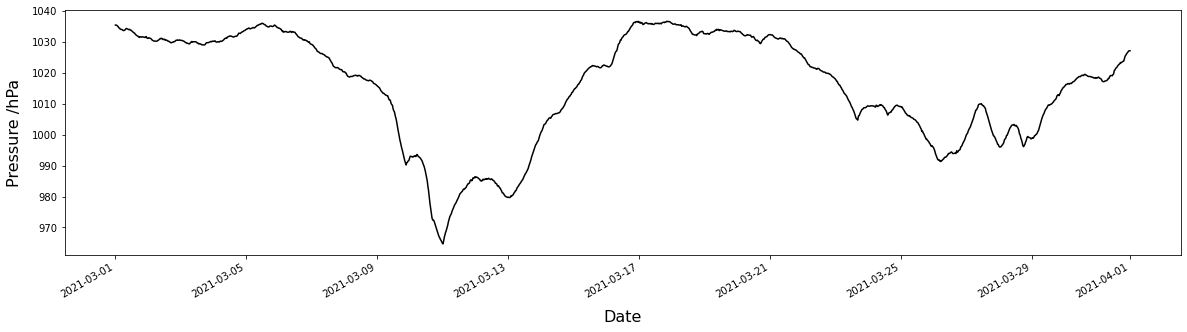

In [190]:
# Plot graph

ax = df.plot(kind='line', x = 'DateTime', y ='Bar', fontsize=10, legend=False, color = 'black',  figsize=(20, 5))
ax.set_xlabel("Date", fontsize=16, labelpad=10)
ax.set_ylabel("Pressure /hPa", fontsize=16, labelpad=10)

plot = ax.get_figure()
plot.set_facecolor('white')
plot.savefig("pressure" + '.png', bbox_inches='tight', dpi=600)

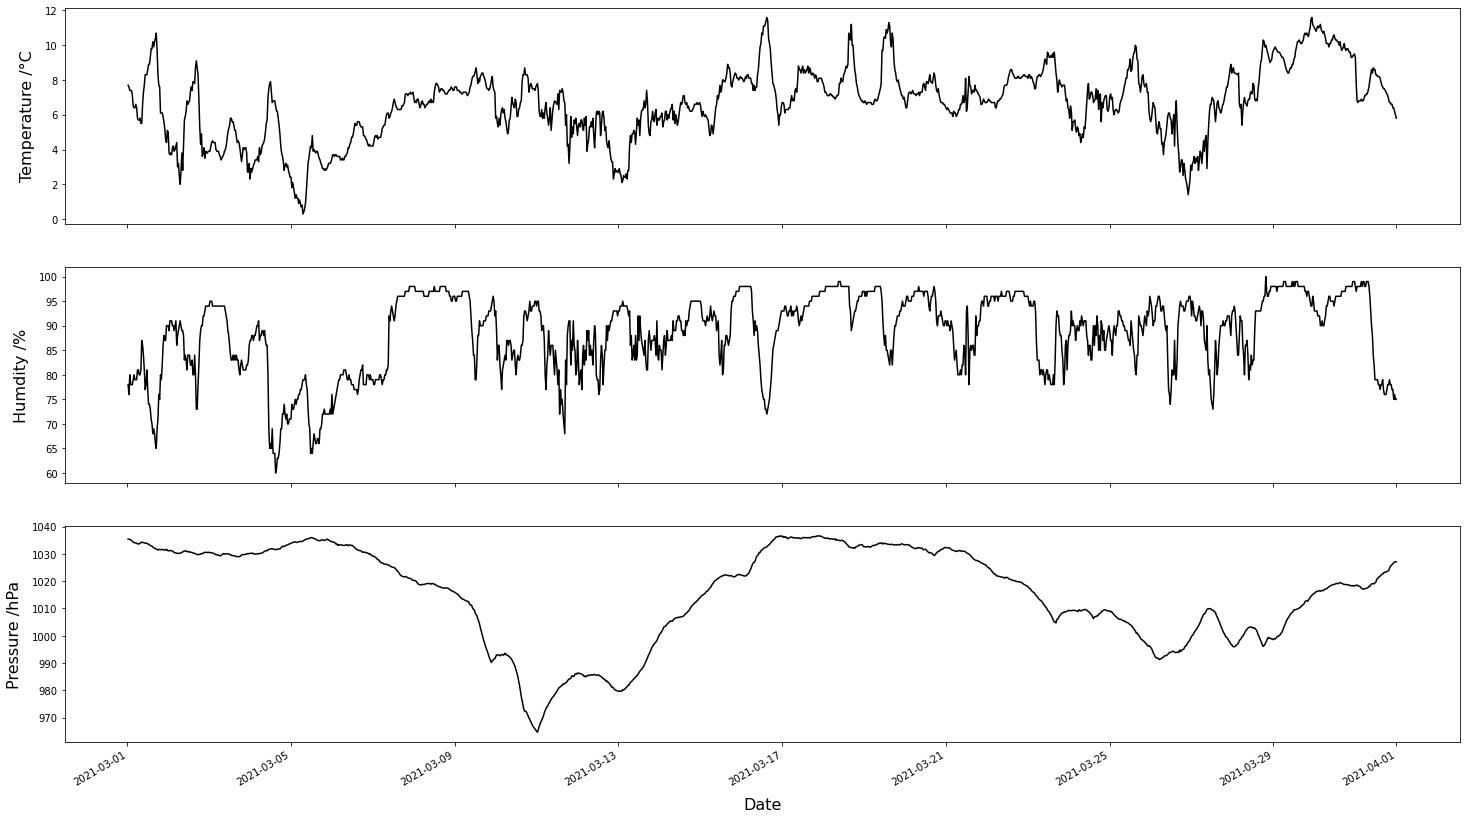

In [191]:
# Plot graph

fig, axs = plt.subplots(3)

ax1 = df.plot(kind='line', x = 'DateTime', y ='Temp Out', fontsize=10, legend=False, color = 'black', ax = axs[0])
ax1.set_xlabel(None)
ax1.set_ylabel("Temperature /°C", fontsize=16, labelpad=10)
ax1.tick_params(labelbottom=False)

ax2 = df.plot(kind='line', x = 'DateTime', y ='Out Hum', fontsize=10, legend=False, color = 'black', ax = axs[1])
ax2.set_xlabel(None)
ax2.set_ylabel("Humdity /%", fontsize=16, labelpad=10)
ax2.tick_params(labelbottom=False)

ax3 = df.plot(kind='line', x = 'DateTime', y ='Bar', fontsize=10, legend=False, color = 'black', ax = axs[2])
ax3.set_xlabel("Date", fontsize=16, labelpad=10)
ax3.set_ylabel("Pressure /hPa", fontsize=16, labelpad=10)


fig.set_figheight(15)
fig.set_figwidth(25)

fig.set_facecolor('white')
fig.savefig("summary" + '.png', bbox_inches='tight', dpi=600)